# Coding Portion: Fashion Item Classification

* Dataset used: **Fashion MNIST** (28 x 28 grayscale images of fashion items)
* Dataset size: 60,000 training samples, 10,000 test samples
* Dataset source: https://github.com/zalandoresearch/fashion-mnist

#### Classification Labels:
Label | Description
:--- | ---
0 | T-shirt/top
1 | Trouser
2 | Pullover
3 | Dress
4 | Coat
5 | Sandal
6 | Shirt
7 | Sneaker
8 | Bag
9 | Ankle boot

### Step 1: Load in the Data

In [6]:
# Import Fashion-MNIST dataset from 'fashion' folder

from fashion import mnist_reader
X_train, y_train = mnist_reader.load_mnist('fashion', kind='train')
X_test, y_test = mnist_reader.load_mnist('fashion', kind='t10k')

In [7]:
# Data exploration

print("Inputs shape is " + str(X_train.shape)) # 60,000 flattened image vectors (784 pixels long)
print("Input type is " + str(type(X_train)))
print("Labels:")
print(y_train)
print("Labels shape is" + str(y_train.shape)) # 60,000 labels
print("Labels type is " + str(type(y_train)))

Inputs shape is (60000, 784)
Input type is <class 'numpy.ndarray'>
Labels:
[9 0 0 ..., 3 0 5]
Labels shape is(60000,)
Labels type is <class 'numpy.ndarray'>


In [8]:
# Convert numerical label to item description

def to_description(label):
    if label == 0: return "T-shirt/top"
    elif label == 1: return "Trouser"
    elif label == 2: return "Pullover"
    elif label == 3: return "Dress"
    elif label == 4: return "Coat"
    elif label == 5: return "Sandal"
    elif label == 6: return "Shirt"
    elif label == 7: return "Sneaker"
    elif label == 8: return "Bag"
    elif label == 9: return "Ankle boot"
    else: return "Label not found"

Label:  9
Description:  Ankle boot


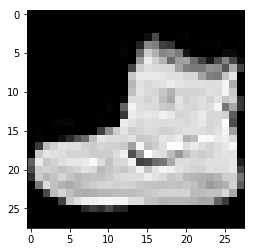

In [9]:
# Visualize the training examples

import matplotlib.pyplot as plt
import numpy as np

def visualize_sample(sample_num):
    flattened_vector = X_train[sample_num] # retrieve flattened vector
    image_2d = np.reshape(flattened_vector, (28, 28)) # reshape to 28 x 28 grayscale image array
    plt.imshow(image_2d, cmap = plt.get_cmap('gray')) # feed image into matplotlib
    print("Label: ", y_train[sample_num]) # print actual label
    print("Description: ", to_description(y_train[sample_num])) # print description
    plt.show()
    
    
visualize_sample(0)

### Step 2: Data Pre-Processing
1. Normalize the feature vectors/pixel values
2. Categorize the outputs

In [10]:
# Normalize pixel values to between 0-1

# TODO: fill this in
    # Hint: maximum pixel value is still 255
    
X_train = X_train/255
X_test = X_test/255

In [11]:
import keras

# TODO: Use Keras to categorize the outputs ("one-hot" vectors)
    # Use variable names: y_train_categorical, y_test_categorical
    
y_train_categorical = keras.utils.to_categorical(y_train, num_classes=10)
y_test_categorical = keras.utils.to_categorical(y_test, num_classes=10)

# let's see result of categorizing the outputs
print(y_test_categorical[:5])

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]]


### Step 3: Create and Compile Neural Network Model

In [12]:
from keras.layers import Dense, Activation
from keras.models import Sequential


model = Sequential()

# TODO: fill this in
# Feel free to experiment with different number of layers, number of neurons, activation functions, etc.
    # Activation functions: https://keras.io/activations/
    # Declaring Keras layers: https://keras.io/layers/core/
    
### Add 1st layer here. Remember that the input_dimension should match up with the input vector dimension!
model.add(Dense(units=500, input_dim=784, activation='relu'))
    
### Add 2nd layer here.
model.add(Dense(units=250, activation='relu'))

# Add final layer here. Make sure the last layer matches up the output vector dimension
    # Hint: use softmax again to output classification probabilities
model.add(Dense(units=10, activation='softmax'))


In [13]:
# TODO: Compile model
    # Loss: categorical cross-entropy
    # Optimizer: stochastic gradient descent
        # Or: experiment with other optimizers? https://keras.io/optimizers/
    # Metrics: accuracy
    
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

    

In [14]:
# TODO: Print model summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 500)               392500    
_________________________________________________________________
dense_5 (Dense)              (None, 250)               125250    
_________________________________________________________________
dense_6 (Dense)              (None, 10)                2510      
Total params: 520,260
Trainable params: 520,260
Non-trainable params: 0
_________________________________________________________________


In [15]:
# Import relevant libraries
from keras_tqdm import TQDMNotebookCallback # TQDM: progress bars
from keras.callbacks import TensorBoard # Tensorboard: training plots
    
# Clear any existing Tensorboard logs
import shutil
shutil.rmtree('./logs', ignore_errors=True)

# Set up callback links to refer back to during training
tensorboard = TensorBoard()
callbacks_list = [TQDMNotebookCallback(), tensorboard]

In [16]:
# TODO: Fit model to training data
    # Reserve some fraction of training data as validation data
    # Pick number of epochs
    # Pick a batch_size
    # Pass in relevant callbacks
    
    
model.fit(X_train, y_train_categorical, epochs=10, batch_size=40, validation_split=0.1, callbacks=callbacks_list)

    
    

Train on 54000 samples, validate on 6000 samples


HBox(children=(IntProgress(value=0, description='Training', max=10), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 0', max=54000), HTML(value='')))

Epoch 1/10


26640/54000 [=============>................] - ETA: 257s - loss: 2.2843 - acc: 0.100 - ETA: 120s - loss: 2.2322 - acc: 0.141 - ETA: 111s - loss: 2.2313 - acc: 0.137 - ETA: 105s - loss: 2.2188 - acc: 0.135 - ETA: 101s - loss: 2.2031 - acc: 0.162 - ETA: 97s - loss: 2.1882 - acc: 0.171 - ETA: 96s - loss: 2.1786 - acc: 0.18 - ETA: 93s - loss: 2.1765 - acc: 0.18 - ETA: 91s - loss: 2.1683 - acc: 0.19 - ETA: 85s - loss: 2.1443 - acc: 0.21 - ETA: 85s - loss: 2.1359 - acc: 0.23 - ETA: 84s - loss: 2.1288 - acc: 0.23 - ETA: 85s - loss: 2.1132 - acc: 0.25 - ETA: 84s - loss: 2.1066 - acc: 0.26 - ETA: 84s - loss: 2.0998 - acc: 0.26 - ETA: 84s - loss: 2.0910 - acc: 0.27 - ETA: 83s - loss: 2.0805 - acc: 0.28 - ETA: 82s - loss: 2.0764 - acc: 0.29 - ETA: 82s - loss: 2.0697 - acc: 0.29 - ETA: 82s - loss: 2.0594 - acc: 0.31 - ETA: 81s - loss: 2.0519 - acc: 0.31 - ETA: 81s - loss: 2.0410 - acc: 0.32 - ETA: 81s - loss: 2.0348 - acc: 0.33 - ETA: 79s - loss: 2.0154 - acc: 0.35 - ETA: 79s - loss: 2.0060 - acc:

54000/54000 [==============================] - ETA: 12s - loss: 0.8940 - acc: 0.71 - ETA: 12s - loss: 0.8915 - acc: 0.71 - ETA: 12s - loss: 0.8901 - acc: 0.71 - ETA: 12s - loss: 0.8890 - acc: 0.71 - ETA: 12s - loss: 0.8874 - acc: 0.71 - ETA: 12s - loss: 0.8852 - acc: 0.71 - ETA: 12s - loss: 0.8837 - acc: 0.72 - ETA: 12s - loss: 0.8820 - acc: 0.72 - ETA: 11s - loss: 0.8812 - acc: 0.72 - ETA: 11s - loss: 0.8795 - acc: 0.72 - ETA: 11s - loss: 0.8787 - acc: 0.72 - ETA: 11s - loss: 0.8774 - acc: 0.72 - ETA: 11s - loss: 0.8757 - acc: 0.72 - ETA: 11s - loss: 0.8744 - acc: 0.72 - ETA: 11s - loss: 0.8726 - acc: 0.72 - ETA: 11s - loss: 0.8714 - acc: 0.72 - ETA: 11s - loss: 0.8704 - acc: 0.72 - ETA: 11s - loss: 0.8691 - acc: 0.72 - ETA: 11s - loss: 0.8673 - acc: 0.72 - ETA: 11s - loss: 0.8665 - acc: 0.72 - ETA: 10s - loss: 0.8654 - acc: 0.72 - ETA: 10s - loss: 0.8639 - acc: 0.72 - ETA: 10s - loss: 0.8622 - acc: 0.72 - ETA: 10s - loss: 0.8614 - acc: 0.72 - ETA: 10s - loss: 0.8602 - acc: 0.72 - ETA

HBox(children=(IntProgress(value=0, description='Epoch 1', max=54000), HTML(value='')))

Epoch 2/10


27400/54000 [==============>...............] - ETA: 22s - loss: 0.4847 - acc: 0.77 - ETA: 21s - loss: 0.5075 - acc: 0.80 - ETA: 23s - loss: 0.5043 - acc: 0.80 - ETA: 21s - loss: 0.5384 - acc: 0.79 - ETA: 22s - loss: 0.5150 - acc: 0.81 - ETA: 21s - loss: 0.5403 - acc: 0.82 - ETA: 22s - loss: 0.5324 - acc: 0.82 - ETA: 22s - loss: 0.5257 - acc: 0.82 - ETA: 21s - loss: 0.5227 - acc: 0.82 - ETA: 20s - loss: 0.5316 - acc: 0.82 - ETA: 21s - loss: 0.5296 - acc: 0.82 - ETA: 21s - loss: 0.5269 - acc: 0.82 - ETA: 21s - loss: 0.5291 - acc: 0.82 - ETA: 20s - loss: 0.5251 - acc: 0.82 - ETA: 20s - loss: 0.5235 - acc: 0.82 - ETA: 20s - loss: 0.5240 - acc: 0.82 - ETA: 20s - loss: 0.5224 - acc: 0.82 - ETA: 21s - loss: 0.5232 - acc: 0.82 - ETA: 21s - loss: 0.5225 - acc: 0.82 - ETA: 21s - loss: 0.5216 - acc: 0.82 - ETA: 21s - loss: 0.5247 - acc: 0.82 - ETA: 20s - loss: 0.5303 - acc: 0.82 - ETA: 20s - loss: 0.5350 - acc: 0.82 - ETA: 20s - loss: 0.5319 - acc: 0.82 - ETA: 20s - loss: 0.5345 - acc: 0.82 - ETA

54000/54000 [==============================] - ETA: 11s - loss: 0.5102 - acc: 0.82 - ETA: 11s - loss: 0.5097 - acc: 0.82 - ETA: 11s - loss: 0.5096 - acc: 0.82 - ETA: 11s - loss: 0.5097 - acc: 0.82 - ETA: 11s - loss: 0.5098 - acc: 0.82 - ETA: 11s - loss: 0.5099 - acc: 0.82 - ETA: 11s - loss: 0.5095 - acc: 0.82 - ETA: 11s - loss: 0.5094 - acc: 0.82 - ETA: 11s - loss: 0.5096 - acc: 0.82 - ETA: 11s - loss: 0.5091 - acc: 0.82 - ETA: 11s - loss: 0.5091 - acc: 0.82 - ETA: 11s - loss: 0.5090 - acc: 0.82 - ETA: 11s - loss: 0.5091 - acc: 0.82 - ETA: 11s - loss: 0.5087 - acc: 0.82 - ETA: 10s - loss: 0.5091 - acc: 0.82 - ETA: 10s - loss: 0.5091 - acc: 0.82 - ETA: 10s - loss: 0.5092 - acc: 0.82 - ETA: 10s - loss: 0.5092 - acc: 0.82 - ETA: 10s - loss: 0.5093 - acc: 0.82 - ETA: 10s - loss: 0.5095 - acc: 0.82 - ETA: 10s - loss: 0.5104 - acc: 0.82 - ETA: 10s - loss: 0.5104 - acc: 0.82 - ETA: 10s - loss: 0.5103 - acc: 0.82 - ETA: 10s - loss: 0.5102 - acc: 0.82 - ETA: 10s - loss: 0.5102 - acc: 0.82 - ETA

HBox(children=(IntProgress(value=0, description='Epoch 2', max=54000), HTML(value='')))

Epoch 3/10


28960/54000 [===============>..............] - ETA: 20s - loss: 0.3518 - acc: 0.90 - ETA: 18s - loss: 0.4709 - acc: 0.84 - ETA: 19s - loss: 0.5104 - acc: 0.82 - ETA: 22s - loss: 0.4950 - acc: 0.82 - ETA: 21s - loss: 0.4675 - acc: 0.84 - ETA: 21s - loss: 0.4803 - acc: 0.83 - ETA: 21s - loss: 0.4974 - acc: 0.83 - ETA: 21s - loss: 0.4955 - acc: 0.83 - ETA: 20s - loss: 0.5027 - acc: 0.82 - ETA: 21s - loss: 0.4948 - acc: 0.82 - ETA: 20s - loss: 0.4968 - acc: 0.82 - ETA: 21s - loss: 0.4842 - acc: 0.83 - ETA: 20s - loss: 0.4825 - acc: 0.83 - ETA: 21s - loss: 0.4772 - acc: 0.83 - ETA: 21s - loss: 0.4776 - acc: 0.83 - ETA: 21s - loss: 0.4827 - acc: 0.83 - ETA: 21s - loss: 0.4784 - acc: 0.83 - ETA: 21s - loss: 0.4733 - acc: 0.83 - ETA: 21s - loss: 0.4670 - acc: 0.84 - ETA: 21s - loss: 0.4711 - acc: 0.83 - ETA: 20s - loss: 0.4648 - acc: 0.84 - ETA: 21s - loss: 0.4612 - acc: 0.84 - ETA: 21s - loss: 0.4640 - acc: 0.83 - ETA: 21s - loss: 0.4630 - acc: 0.84 - ETA: 21s - loss: 0.4730 - acc: 0.83 - ETA

54000/54000 [==============================] - ETA: 10s - loss: 0.4544 - acc: 0.84 - ETA: 10s - loss: 0.4540 - acc: 0.84 - ETA: 10s - loss: 0.4539 - acc: 0.84 - ETA: 10s - loss: 0.4536 - acc: 0.84 - ETA: 10s - loss: 0.4536 - acc: 0.84 - ETA: 9s - loss: 0.4534 - acc: 0.8424 - ETA: 9s - loss: 0.4540 - acc: 0.842 - ETA: 9s - loss: 0.4537 - acc: 0.842 - ETA: 9s - loss: 0.4532 - acc: 0.842 - ETA: 9s - loss: 0.4526 - acc: 0.843 - ETA: 9s - loss: 0.4526 - acc: 0.843 - ETA: 9s - loss: 0.4522 - acc: 0.843 - ETA: 9s - loss: 0.4523 - acc: 0.843 - ETA: 9s - loss: 0.4522 - acc: 0.843 - ETA: 9s - loss: 0.4523 - acc: 0.842 - ETA: 9s - loss: 0.4523 - acc: 0.842 - ETA: 9s - loss: 0.4522 - acc: 0.842 - ETA: 9s - loss: 0.4525 - acc: 0.842 - ETA: 9s - loss: 0.4527 - acc: 0.842 - ETA: 8s - loss: 0.4528 - acc: 0.842 - ETA: 8s - loss: 0.4526 - acc: 0.842 - ETA: 8s - loss: 0.4526 - acc: 0.842 - ETA: 8s - loss: 0.4527 - acc: 0.842 - ETA: 8s - loss: 0.4524 - acc: 0.842 - ETA: 8s - loss: 0.4521 - acc: 0.842 - ET

HBox(children=(IntProgress(value=0, description='Epoch 3', max=54000), HTML(value='')))

Epoch 4/10


33880/54000 [=================>............] - ETA: 27s - loss: 0.3838 - acc: 0.87 - ETA: 21s - loss: 0.4935 - acc: 0.82 - ETA: 18s - loss: 0.4681 - acc: 0.83 - ETA: 18s - loss: 0.4738 - acc: 0.83 - ETA: 17s - loss: 0.4553 - acc: 0.84 - ETA: 17s - loss: 0.4704 - acc: 0.83 - ETA: 17s - loss: 0.4623 - acc: 0.84 - ETA: 17s - loss: 0.4612 - acc: 0.84 - ETA: 17s - loss: 0.4652 - acc: 0.84 - ETA: 17s - loss: 0.4552 - acc: 0.84 - ETA: 17s - loss: 0.4607 - acc: 0.84 - ETA: 17s - loss: 0.4543 - acc: 0.84 - ETA: 17s - loss: 0.4560 - acc: 0.84 - ETA: 17s - loss: 0.4576 - acc: 0.84 - ETA: 17s - loss: 0.4586 - acc: 0.84 - ETA: 17s - loss: 0.4579 - acc: 0.84 - ETA: 17s - loss: 0.4591 - acc: 0.84 - ETA: 17s - loss: 0.4597 - acc: 0.84 - ETA: 17s - loss: 0.4580 - acc: 0.84 - ETA: 17s - loss: 0.4569 - acc: 0.84 - ETA: 17s - loss: 0.4565 - acc: 0.84 - ETA: 17s - loss: 0.4526 - acc: 0.84 - ETA: 17s - loss: 0.4449 - acc: 0.84 - ETA: 17s - loss: 0.4413 - acc: 0.84 - ETA: 17s - loss: 0.4439 - acc: 0.84 - ETA

54000/54000 [==============================] - ETA: 7s - loss: 0.4287 - acc: 0.851 - ETA: 6s - loss: 0.4283 - acc: 0.851 - ETA: 6s - loss: 0.4284 - acc: 0.851 - ETA: 6s - loss: 0.4284 - acc: 0.851 - ETA: 6s - loss: 0.4283 - acc: 0.851 - ETA: 6s - loss: 0.4280 - acc: 0.852 - ETA: 6s - loss: 0.4280 - acc: 0.852 - ETA: 6s - loss: 0.4280 - acc: 0.852 - ETA: 6s - loss: 0.4282 - acc: 0.851 - ETA: 6s - loss: 0.4283 - acc: 0.851 - ETA: 6s - loss: 0.4281 - acc: 0.851 - ETA: 6s - loss: 0.4277 - acc: 0.852 - ETA: 6s - loss: 0.4277 - acc: 0.851 - ETA: 6s - loss: 0.4279 - acc: 0.851 - ETA: 6s - loss: 0.4283 - acc: 0.851 - ETA: 6s - loss: 0.4281 - acc: 0.851 - ETA: 6s - loss: 0.4280 - acc: 0.851 - ETA: 6s - loss: 0.4279 - acc: 0.851 - ETA: 6s - loss: 0.4274 - acc: 0.852 - ETA: 6s - loss: 0.4269 - acc: 0.852 - ETA: 5s - loss: 0.4268 - acc: 0.852 - ETA: 5s - loss: 0.4264 - acc: 0.852 - ETA: 5s - loss: 0.4266 - acc: 0.852 - ETA: 5s - loss: 0.4265 - acc: 0.852 - ETA: 5s - loss: 0.4265 - acc: 0.852 - ETA

HBox(children=(IntProgress(value=0, description='Epoch 4', max=54000), HTML(value='')))

Epoch 5/10


32920/54000 [=================>............] - ETA: 25s - loss: 0.3775 - acc: 0.87 - ETA: 20s - loss: 0.3975 - acc: 0.86 - ETA: 20s - loss: 0.4050 - acc: 0.85 - ETA: 22s - loss: 0.4143 - acc: 0.85 - ETA: 21s - loss: 0.4088 - acc: 0.85 - ETA: 20s - loss: 0.4097 - acc: 0.85 - ETA: 20s - loss: 0.3998 - acc: 0.86 - ETA: 20s - loss: 0.3930 - acc: 0.86 - ETA: 19s - loss: 0.4126 - acc: 0.85 - ETA: 19s - loss: 0.4089 - acc: 0.85 - ETA: 19s - loss: 0.4111 - acc: 0.85 - ETA: 19s - loss: 0.4005 - acc: 0.85 - ETA: 19s - loss: 0.3992 - acc: 0.85 - ETA: 19s - loss: 0.3991 - acc: 0.85 - ETA: 19s - loss: 0.4007 - acc: 0.85 - ETA: 18s - loss: 0.3975 - acc: 0.85 - ETA: 18s - loss: 0.3952 - acc: 0.86 - ETA: 18s - loss: 0.3962 - acc: 0.86 - ETA: 18s - loss: 0.4032 - acc: 0.86 - ETA: 18s - loss: 0.4031 - acc: 0.86 - ETA: 18s - loss: 0.4027 - acc: 0.86 - ETA: 18s - loss: 0.4019 - acc: 0.86 - ETA: 18s - loss: 0.4079 - acc: 0.86 - ETA: 18s - loss: 0.4064 - acc: 0.85 - ETA: 18s - loss: 0.4084 - acc: 0.85 - ETA

54000/54000 [==============================] - ETA: 7s - loss: 0.4094 - acc: 0.858 - ETA: 7s - loss: 0.4093 - acc: 0.858 - ETA: 7s - loss: 0.4089 - acc: 0.858 - ETA: 7s - loss: 0.4091 - acc: 0.858 - ETA: 7s - loss: 0.4091 - acc: 0.858 - ETA: 7s - loss: 0.4089 - acc: 0.858 - ETA: 7s - loss: 0.4089 - acc: 0.858 - ETA: 7s - loss: 0.4094 - acc: 0.858 - ETA: 7s - loss: 0.4090 - acc: 0.858 - ETA: 7s - loss: 0.4089 - acc: 0.858 - ETA: 7s - loss: 0.4094 - acc: 0.857 - ETA: 7s - loss: 0.4092 - acc: 0.857 - ETA: 7s - loss: 0.4092 - acc: 0.857 - ETA: 7s - loss: 0.4087 - acc: 0.858 - ETA: 7s - loss: 0.4079 - acc: 0.858 - ETA: 7s - loss: 0.4076 - acc: 0.858 - ETA: 7s - loss: 0.4076 - acc: 0.858 - ETA: 7s - loss: 0.4072 - acc: 0.858 - ETA: 7s - loss: 0.4076 - acc: 0.858 - ETA: 6s - loss: 0.4074 - acc: 0.858 - ETA: 6s - loss: 0.4073 - acc: 0.858 - ETA: 6s - loss: 0.4073 - acc: 0.858 - ETA: 6s - loss: 0.4074 - acc: 0.858 - ETA: 6s - loss: 0.4075 - acc: 0.858 - ETA: 6s - loss: 0.4076 - acc: 0.858 - ETA

HBox(children=(IntProgress(value=0, description='Epoch 5', max=54000), HTML(value='')))

Epoch 6/10


32960/54000 [=================>............] - ETA: 30s - loss: 0.2086 - acc: 0.92 - ETA: 21s - loss: 0.4061 - acc: 0.84 - ETA: 21s - loss: 0.3977 - acc: 0.84 - ETA: 22s - loss: 0.3958 - acc: 0.84 - ETA: 22s - loss: 0.3797 - acc: 0.85 - ETA: 22s - loss: 0.3765 - acc: 0.85 - ETA: 21s - loss: 0.3837 - acc: 0.85 - ETA: 22s - loss: 0.3870 - acc: 0.86 - ETA: 21s - loss: 0.3884 - acc: 0.86 - ETA: 21s - loss: 0.3941 - acc: 0.85 - ETA: 21s - loss: 0.3919 - acc: 0.85 - ETA: 21s - loss: 0.3823 - acc: 0.86 - ETA: 21s - loss: 0.3885 - acc: 0.85 - ETA: 20s - loss: 0.3831 - acc: 0.86 - ETA: 20s - loss: 0.3901 - acc: 0.85 - ETA: 20s - loss: 0.3898 - acc: 0.85 - ETA: 20s - loss: 0.3939 - acc: 0.85 - ETA: 20s - loss: 0.3922 - acc: 0.85 - ETA: 20s - loss: 0.3962 - acc: 0.85 - ETA: 19s - loss: 0.4012 - acc: 0.85 - ETA: 19s - loss: 0.4017 - acc: 0.85 - ETA: 19s - loss: 0.3966 - acc: 0.85 - ETA: 19s - loss: 0.3983 - acc: 0.85 - ETA: 19s - loss: 0.3930 - acc: 0.85 - ETA: 19s - loss: 0.3928 - acc: 0.85 - ETA

54000/54000 [==============================] - ETA: 7s - loss: 0.3930 - acc: 0.863 - ETA: 7s - loss: 0.3927 - acc: 0.863 - ETA: 7s - loss: 0.3925 - acc: 0.863 - ETA: 7s - loss: 0.3923 - acc: 0.863 - ETA: 7s - loss: 0.3924 - acc: 0.863 - ETA: 7s - loss: 0.3922 - acc: 0.863 - ETA: 7s - loss: 0.3921 - acc: 0.863 - ETA: 7s - loss: 0.3924 - acc: 0.863 - ETA: 7s - loss: 0.3925 - acc: 0.863 - ETA: 7s - loss: 0.3933 - acc: 0.863 - ETA: 7s - loss: 0.3932 - acc: 0.863 - ETA: 7s - loss: 0.3933 - acc: 0.863 - ETA: 7s - loss: 0.3933 - acc: 0.863 - ETA: 7s - loss: 0.3929 - acc: 0.863 - ETA: 7s - loss: 0.3933 - acc: 0.863 - ETA: 6s - loss: 0.3936 - acc: 0.863 - ETA: 6s - loss: 0.3934 - acc: 0.862 - ETA: 6s - loss: 0.3931 - acc: 0.863 - ETA: 6s - loss: 0.3931 - acc: 0.862 - ETA: 6s - loss: 0.3934 - acc: 0.862 - ETA: 6s - loss: 0.3933 - acc: 0.862 - ETA: 6s - loss: 0.3932 - acc: 0.862 - ETA: 6s - loss: 0.3934 - acc: 0.862 - ETA: 6s - loss: 0.3936 - acc: 0.862 - ETA: 6s - loss: 0.3939 - acc: 0.862 - ETA

HBox(children=(IntProgress(value=0, description='Epoch 6', max=54000), HTML(value='')))

Epoch 7/10


29000/54000 [===============>..............] - ETA: 28s - loss: 0.2524 - acc: 0.95 - ETA: 24s - loss: 0.3944 - acc: 0.87 - ETA: 22s - loss: 0.3860 - acc: 0.88 - ETA: 22s - loss: 0.4044 - acc: 0.87 - ETA: 22s - loss: 0.3972 - acc: 0.87 - ETA: 23s - loss: 0.3934 - acc: 0.87 - ETA: 23s - loss: 0.3938 - acc: 0.87 - ETA: 23s - loss: 0.3894 - acc: 0.86 - ETA: 22s - loss: 0.3909 - acc: 0.86 - ETA: 22s - loss: 0.3729 - acc: 0.87 - ETA: 22s - loss: 0.3785 - acc: 0.87 - ETA: 22s - loss: 0.3840 - acc: 0.87 - ETA: 22s - loss: 0.3744 - acc: 0.87 - ETA: 21s - loss: 0.3712 - acc: 0.87 - ETA: 21s - loss: 0.3716 - acc: 0.87 - ETA: 21s - loss: 0.3739 - acc: 0.87 - ETA: 20s - loss: 0.3785 - acc: 0.87 - ETA: 20s - loss: 0.3798 - acc: 0.87 - ETA: 20s - loss: 0.3864 - acc: 0.87 - ETA: 19s - loss: 0.3837 - acc: 0.87 - ETA: 19s - loss: 0.3839 - acc: 0.86 - ETA: 19s - loss: 0.3832 - acc: 0.86 - ETA: 19s - loss: 0.3797 - acc: 0.87 - ETA: 19s - loss: 0.3802 - acc: 0.86 - ETA: 19s - loss: 0.3813 - acc: 0.86 - ETA

54000/54000 [==============================] - ETA: 10s - loss: 0.3720 - acc: 0.86 - ETA: 10s - loss: 0.3725 - acc: 0.86 - ETA: 10s - loss: 0.3725 - acc: 0.86 - ETA: 10s - loss: 0.3730 - acc: 0.86 - ETA: 10s - loss: 0.3728 - acc: 0.86 - ETA: 10s - loss: 0.3723 - acc: 0.86 - ETA: 9s - loss: 0.3729 - acc: 0.8681 - ETA: 9s - loss: 0.3731 - acc: 0.868 - ETA: 9s - loss: 0.3733 - acc: 0.868 - ETA: 9s - loss: 0.3731 - acc: 0.868 - ETA: 9s - loss: 0.3733 - acc: 0.868 - ETA: 9s - loss: 0.3731 - acc: 0.868 - ETA: 9s - loss: 0.3734 - acc: 0.868 - ETA: 9s - loss: 0.3734 - acc: 0.868 - ETA: 9s - loss: 0.3732 - acc: 0.868 - ETA: 9s - loss: 0.3736 - acc: 0.868 - ETA: 9s - loss: 0.3739 - acc: 0.867 - ETA: 9s - loss: 0.3740 - acc: 0.867 - ETA: 9s - loss: 0.3745 - acc: 0.867 - ETA: 9s - loss: 0.3744 - acc: 0.867 - ETA: 9s - loss: 0.3750 - acc: 0.867 - ETA: 9s - loss: 0.3749 - acc: 0.867 - ETA: 9s - loss: 0.3747 - acc: 0.867 - ETA: 9s - loss: 0.3748 - acc: 0.867 - ETA: 8s - loss: 0.3748 - acc: 0.867 - ET

HBox(children=(IntProgress(value=0, description='Epoch 7', max=54000), HTML(value='')))

Epoch 8/10


34720/54000 [==================>...........] - ETA: 21s - loss: 0.4092 - acc: 0.82 - ETA: 16s - loss: 0.3329 - acc: 0.88 - ETA: 16s - loss: 0.3293 - acc: 0.87 - ETA: 16s - loss: 0.3579 - acc: 0.86 - ETA: 16s - loss: 0.3813 - acc: 0.85 - ETA: 17s - loss: 0.3900 - acc: 0.86 - ETA: 17s - loss: 0.3859 - acc: 0.86 - ETA: 17s - loss: 0.3980 - acc: 0.85 - ETA: 17s - loss: 0.3925 - acc: 0.85 - ETA: 17s - loss: 0.3837 - acc: 0.85 - ETA: 16s - loss: 0.3737 - acc: 0.86 - ETA: 17s - loss: 0.3815 - acc: 0.86 - ETA: 17s - loss: 0.3795 - acc: 0.86 - ETA: 17s - loss: 0.3799 - acc: 0.86 - ETA: 17s - loss: 0.3728 - acc: 0.86 - ETA: 16s - loss: 0.3724 - acc: 0.86 - ETA: 16s - loss: 0.3703 - acc: 0.86 - ETA: 16s - loss: 0.3650 - acc: 0.87 - ETA: 16s - loss: 0.3625 - acc: 0.87 - ETA: 16s - loss: 0.3638 - acc: 0.87 - ETA: 16s - loss: 0.3645 - acc: 0.86 - ETA: 16s - loss: 0.3648 - acc: 0.86 - ETA: 16s - loss: 0.3641 - acc: 0.86 - ETA: 16s - loss: 0.3618 - acc: 0.87 - ETA: 16s - loss: 0.3626 - acc: 0.87 - ETA

54000/54000 [==============================] - ETA: 6s - loss: 0.3597 - acc: 0.874 - ETA: 6s - loss: 0.3598 - acc: 0.874 - ETA: 6s - loss: 0.3596 - acc: 0.874 - ETA: 6s - loss: 0.3595 - acc: 0.874 - ETA: 6s - loss: 0.3592 - acc: 0.874 - ETA: 6s - loss: 0.3592 - acc: 0.874 - ETA: 6s - loss: 0.3591 - acc: 0.874 - ETA: 6s - loss: 0.3589 - acc: 0.874 - ETA: 6s - loss: 0.3592 - acc: 0.874 - ETA: 6s - loss: 0.3593 - acc: 0.874 - ETA: 5s - loss: 0.3595 - acc: 0.874 - ETA: 5s - loss: 0.3597 - acc: 0.874 - ETA: 5s - loss: 0.3597 - acc: 0.874 - ETA: 5s - loss: 0.3608 - acc: 0.874 - ETA: 5s - loss: 0.3605 - acc: 0.874 - ETA: 5s - loss: 0.3607 - acc: 0.874 - ETA: 5s - loss: 0.3611 - acc: 0.874 - ETA: 5s - loss: 0.3613 - acc: 0.874 - ETA: 5s - loss: 0.3621 - acc: 0.873 - ETA: 5s - loss: 0.3621 - acc: 0.873 - ETA: 5s - loss: 0.3619 - acc: 0.873 - ETA: 5s - loss: 0.3621 - acc: 0.873 - ETA: 5s - loss: 0.3622 - acc: 0.873 - ETA: 5s - loss: 0.3619 - acc: 0.873 - ETA: 5s - loss: 0.3621 - acc: 0.873 - ETA

HBox(children=(IntProgress(value=0, description='Epoch 8', max=54000), HTML(value='')))

Epoch 9/10


34240/54000 [==================>...........] - ETA: 28s - loss: 0.1841 - acc: 0.92 - ETA: 21s - loss: 0.3305 - acc: 0.88 - ETA: 19s - loss: 0.3819 - acc: 0.85 - ETA: 19s - loss: 0.3684 - acc: 0.86 - ETA: 18s - loss: 0.3842 - acc: 0.86 - ETA: 18s - loss: 0.3765 - acc: 0.86 - ETA: 18s - loss: 0.3792 - acc: 0.85 - ETA: 18s - loss: 0.3815 - acc: 0.85 - ETA: 17s - loss: 0.3924 - acc: 0.85 - ETA: 17s - loss: 0.3750 - acc: 0.86 - ETA: 17s - loss: 0.3886 - acc: 0.85 - ETA: 17s - loss: 0.3817 - acc: 0.86 - ETA: 17s - loss: 0.3708 - acc: 0.86 - ETA: 17s - loss: 0.3623 - acc: 0.87 - ETA: 17s - loss: 0.3594 - acc: 0.87 - ETA: 17s - loss: 0.3634 - acc: 0.87 - ETA: 17s - loss: 0.3691 - acc: 0.87 - ETA: 17s - loss: 0.3663 - acc: 0.87 - ETA: 17s - loss: 0.3679 - acc: 0.87 - ETA: 17s - loss: 0.3650 - acc: 0.87 - ETA: 17s - loss: 0.3661 - acc: 0.87 - ETA: 17s - loss: 0.3662 - acc: 0.87 - ETA: 17s - loss: 0.3687 - acc: 0.87 - ETA: 17s - loss: 0.3656 - acc: 0.87 - ETA: 17s - loss: 0.3636 - acc: 0.87 - ETA

54000/54000 [==============================] - ETA: 6s - loss: 0.3527 - acc: 0.876 - ETA: 6s - loss: 0.3527 - acc: 0.876 - ETA: 6s - loss: 0.3523 - acc: 0.876 - ETA: 6s - loss: 0.3518 - acc: 0.876 - ETA: 6s - loss: 0.3522 - acc: 0.876 - ETA: 6s - loss: 0.3523 - acc: 0.876 - ETA: 6s - loss: 0.3525 - acc: 0.876 - ETA: 6s - loss: 0.3525 - acc: 0.876 - ETA: 6s - loss: 0.3523 - acc: 0.876 - ETA: 6s - loss: 0.3526 - acc: 0.876 - ETA: 6s - loss: 0.3527 - acc: 0.876 - ETA: 6s - loss: 0.3527 - acc: 0.876 - ETA: 6s - loss: 0.3525 - acc: 0.876 - ETA: 6s - loss: 0.3524 - acc: 0.876 - ETA: 5s - loss: 0.3523 - acc: 0.876 - ETA: 5s - loss: 0.3522 - acc: 0.876 - ETA: 5s - loss: 0.3521 - acc: 0.876 - ETA: 5s - loss: 0.3519 - acc: 0.876 - ETA: 5s - loss: 0.3519 - acc: 0.876 - ETA: 5s - loss: 0.3520 - acc: 0.876 - ETA: 5s - loss: 0.3518 - acc: 0.876 - ETA: 5s - loss: 0.3517 - acc: 0.876 - ETA: 5s - loss: 0.3520 - acc: 0.876 - ETA: 5s - loss: 0.3521 - acc: 0.876 - ETA: 5s - loss: 0.3522 - acc: 0.876 - ETA

HBox(children=(IntProgress(value=0, description='Epoch 9', max=54000), HTML(value='')))

Epoch 10/10


29320/54000 [===============>..............] - ETA: 21s - loss: 0.2881 - acc: 0.82 - ETA: 19s - loss: 0.3140 - acc: 0.86 - ETA: 20s - loss: 0.3016 - acc: 0.87 - ETA: 21s - loss: 0.3025 - acc: 0.88 - ETA: 20s - loss: 0.3032 - acc: 0.88 - ETA: 20s - loss: 0.3098 - acc: 0.88 - ETA: 19s - loss: 0.3074 - acc: 0.89 - ETA: 19s - loss: 0.3072 - acc: 0.89 - ETA: 19s - loss: 0.3096 - acc: 0.89 - ETA: 19s - loss: 0.3122 - acc: 0.89 - ETA: 19s - loss: 0.3198 - acc: 0.89 - ETA: 18s - loss: 0.3264 - acc: 0.88 - ETA: 18s - loss: 0.3244 - acc: 0.88 - ETA: 18s - loss: 0.3181 - acc: 0.88 - ETA: 18s - loss: 0.3263 - acc: 0.88 - ETA: 18s - loss: 0.3269 - acc: 0.88 - ETA: 18s - loss: 0.3303 - acc: 0.88 - ETA: 18s - loss: 0.3286 - acc: 0.88 - ETA: 18s - loss: 0.3298 - acc: 0.88 - ETA: 18s - loss: 0.3311 - acc: 0.88 - ETA: 18s - loss: 0.3286 - acc: 0.88 - ETA: 18s - loss: 0.3311 - acc: 0.88 - ETA: 18s - loss: 0.3314 - acc: 0.88 - ETA: 18s - loss: 0.3313 - acc: 0.88 - ETA: 17s - loss: 0.3301 - acc: 0.88 - ETA

54000/54000 [==============================] - ETA: 10s - loss: 0.3463 - acc: 0.87 - ETA: 10s - loss: 0.3461 - acc: 0.87 - ETA: 9s - loss: 0.3459 - acc: 0.8791 - ETA: 9s - loss: 0.3460 - acc: 0.879 - ETA: 9s - loss: 0.3459 - acc: 0.879 - ETA: 9s - loss: 0.3461 - acc: 0.879 - ETA: 9s - loss: 0.3458 - acc: 0.879 - ETA: 9s - loss: 0.3458 - acc: 0.879 - ETA: 9s - loss: 0.3462 - acc: 0.878 - ETA: 9s - loss: 0.3469 - acc: 0.878 - ETA: 9s - loss: 0.3468 - acc: 0.878 - ETA: 9s - loss: 0.3468 - acc: 0.878 - ETA: 9s - loss: 0.3468 - acc: 0.878 - ETA: 9s - loss: 0.3468 - acc: 0.878 - ETA: 9s - loss: 0.3466 - acc: 0.878 - ETA: 9s - loss: 0.3468 - acc: 0.878 - ETA: 8s - loss: 0.3468 - acc: 0.878 - ETA: 8s - loss: 0.3464 - acc: 0.878 - ETA: 8s - loss: 0.3467 - acc: 0.878 - ETA: 8s - loss: 0.3466 - acc: 0.878 - ETA: 8s - loss: 0.3464 - acc: 0.878 - ETA: 8s - loss: 0.3462 - acc: 0.878 - ETA: 8s - loss: 0.3464 - acc: 0.878 - ETA: 8s - loss: 0.3462 - acc: 0.878 - ETA: 8s - loss: 0.3463 - acc: 0.878 - ET

### Step 4: Evaluate the Model

In [17]:
# TODO: Evaluate model on test data

# Use model.evaluate()
# Also: open up the training logs in Tensorboard to check validation_loss for overfitting
loss_and_metrics = model.evaluate(X_test, y_test_categorical, batch_size=128)

print(loss_and_metrics)

 9472/10000 [===========================>..] - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA: 0s[0.38889295005798341, 0.85850000000000004]


In [18]:
# Final predictions testing

import numpy as np

# Compare actual class to predicted class
def visualize_test_sample(test_sample_num):
    
    # Display actual image & label
    flattened_vector = X_test[test_sample_num] # retrieve flattened vector
    image_2d = np.reshape(flattened_vector, (28, 28)) # reshape to 28 x 28 grayscale image array
    plt.imshow(image_2d, cmap = plt.get_cmap('gray')) # feed image into matplotlib
    print("Actual Label: ", y_test[test_sample_num]) # print actual label
    print("Actual Description: ", to_description(y_test[test_sample_num])) # print description
    plt.show()
    
    # Print predicted label
    test_sample = np.expand_dims(X_test[test_sample_num], axis=0) # pick out a one-sample "batch" to feed into model
    predicted_scores = model.predict(test_sample) # outputted probabilities vector
    print("Outputted scores: ", predicted_scores) # print predicted scores

    predicted_class = np.argmax(predicted_scores) # pick the class with highest probability --> final prediction
    print("Predicted Label: ", predicted_class) # print predicted classification
    print("Predicted Description: ", to_description(predicted_class)) # print predicted label description

Actual Label:  7
Actual Description:  Sneaker


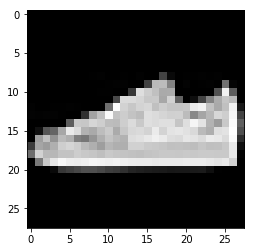

Outputted scores:  [[  2.01519086e-08   6.11523490e-08   2.85671646e-08   7.21597814e-07
    2.83932824e-08   1.27800496e-03   8.30493292e-08   9.96688664e-01
    1.20043027e-04   1.91240141e-03]]
Predicted Label:  7
Predicted Description:  Sneaker


In [21]:
visualize_test_sample(22
                     )